<a href="https://colab.research.google.com/github/pintofben/numpyMiniProj/blob/main/TutorialCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the Necessary Packages
import numpy as np
import sys
import datetime
import math as ma
import matplotlib.pyplot as plt

# Creating a function for Monte Carlo Simulation
def inside_circle(total_count):
  x = np.random.uniform(size=total_count)
  y = np.random.uniform(size=total_count)
  radii = np.sqrt(x**2 + y**2)
  count = len(radii[np.where(radii<=1.0)])
  return count

# Crating the Main Function
def main():
  monte_array = np.array( [] )
  for n_samples in [10**i for i in range(2, 9)]:
    start_time = datetime.datetime.now()
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    rel_Error = abs(ma.pi - my_pi) / ma.pi
    monte_array = np.append(monte_array, [my_pi, elapsed_time, n_samples, memory_required, rel_Error])

    print("Pi: {}, memory: {} GiB, time: {} s, Number of Samples: {}, Relative Error: {}".format(my_pi, memory_required,
                                                  elapsed_time, n_samples, rel_Error))
  monte_array = monte_array.reshape(-1,5)

  np.savetxt("montRay.csv", monte_array, delimiter=",")

if __name__ == '__main__':
  main()

Pi: 3.08, memory: 2.2351741790771484e-06 GiB, time: 0.034004 s, Number of Samples: 100, Relative Error: 0.01960555055392467
Pi: 3.14, memory: 2.2351741790771484e-05 GiB, time: 0.001068 s, Number of Samples: 1000, Relative Error: 0.0005069573828972128
Pi: 3.1312, memory: 0.00022351741790771484 GiB, time: 0.000663 s, Number of Samples: 10000, Relative Error: 0.0033080843813145452
Pi: 3.1366, memory: 0.0022351741790771484 GiB, time: 0.024492 s, Number of Samples: 100000, Relative Error: 0.0015892109959221234
Pi: 3.141516, memory: 0.022351741790771484 GiB, time: 0.137377 s, Number of Samples: 1000000, Relative Error: 2.4399595442562964e-05
Pi: 3.1421748, memory: 0.22351741790771484 GiB, time: 2.302644 s, Number of Samples: 10000000, Relative Error: 0.0001853029575751994
Pi: 3.14164784, memory: 2.2351741790771484 GiB, time: 6.336253 s, Number of Samples: 100000000, Relative Error: 1.756637995187081e-05


In [3]:
# Loading the csv
data = np.loadtxt("montRay.csv", delimiter=",")

# Naming the variables
theNumSamp = data[:,2]
theTime = data[:,1]
theMem = data[:,3]
theRelErr = data[:,4]


-4.7588292596187444e-11 0.004360665683501776


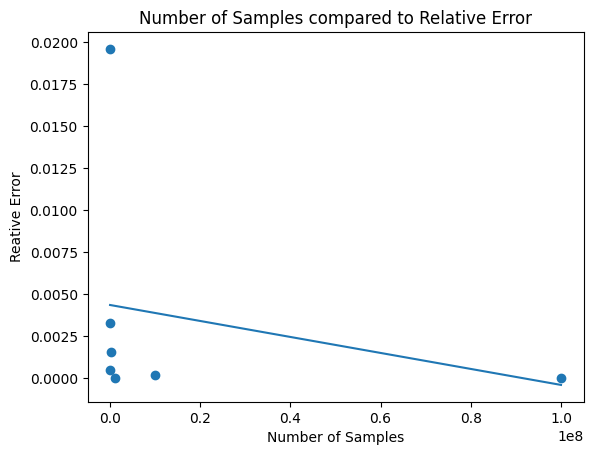

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(x=theNumSamp, y=theRelErr)

ax.set_title("Number of Samples compared to Relative Error")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Reative Error")

z = np.polyfit(theNumSamp, theRelErr, 1)
p = np.poly1d(z)
plt.plot(theNumSamp, p(theNumSamp))
print(z[0],z[1])
# z[0] is the slope of the trendline
# z[1] is the y-intercept of the trendline

2.2351741790771484e-08 -1.673219294748522e-17


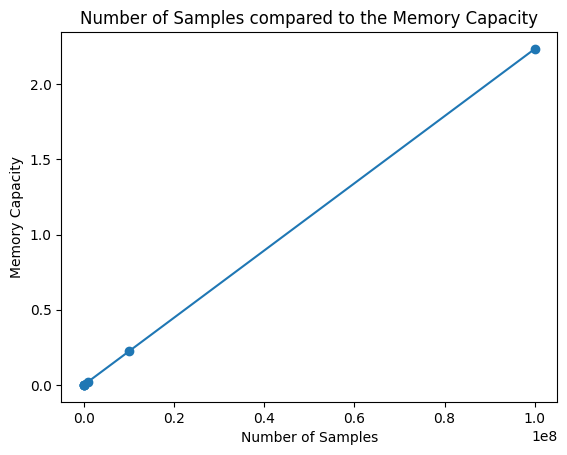

In [5]:
fig, ax = plt.subplots()

ax.scatter(x=theNumSamp, y=theMem)

ax.set_title("Number of Samples compared to the Memory Capacity")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Memory Capacity")

z = np.polyfit(theNumSamp, theMem, 1)
p = np.poly1d(z)
plt.plot(theNumSamp, p(theNumSamp))
print(z[0],z[1])
# z[0] is the slope of the trendline
# z[1] is the y-intercept of the trendline

6.195375807294727e-08 0.27896439876870677


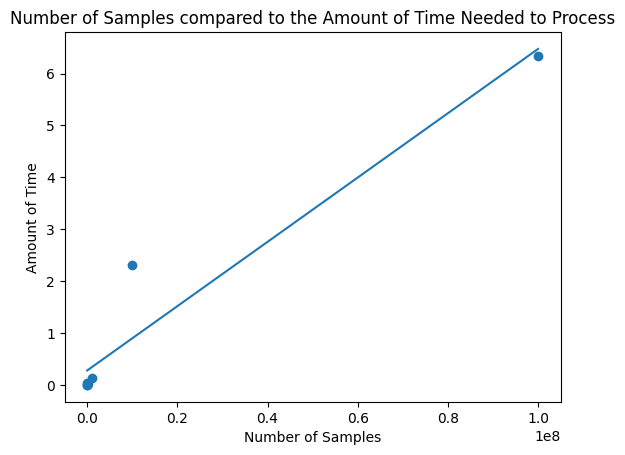

In [6]:
fig, ax = plt.subplots()

ax.scatter(x=theNumSamp, y=theTime)

ax.set_title("Number of Samples compared to the Amount of Time Needed to Process")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Amount of Time")

z = np.polyfit(theNumSamp, theTime, 1)
p = np.poly1d(z)
plt.plot(theNumSamp, p(theNumSamp))
print(z[0],z[1])
# z[0] is the slope of the trendline
# z[1] is the y-intercept of the trendline

1. How much more accurate does the estimate of π become as N is
increased?  When N is increased by a factor of 10, does the error
decrease by a factor of 10?

*   the more estimations of pi that are added by a larger n makes the estimation of pi more accurate as it becomes closer and closer to the exact decimal of pi. because the x and y are randomized decimals, it is not get closer to the exact decimal by an exact factor of 10.

2. How does the amount of memory required scale as N is increased?  
Do you expect that it would be linear?  How would the slope of the
trendline in the log-log plot demonstrate that?

*   It does seem like the memory gets larger by a factor of 10 everytime the number of samples increases by a factor of 10. I would expect this to be linear, even though its not, because I would expect every samples output would take up the same amount as the previous.

3. How does the amount of time to calculate scale as N is increased?  
Do you expect that it would be linear?  How would the slope of the
trendline in the log-log plot demonstrate that?

*   It is somewhat linear but not all linear. The time is not the exact same everytime as it doesn't fall exactly upon the line everytime but they fall slightly above or below everytime. The linear trendline is a good interpretation of what the the time should apporximately be.
